# EDA - Exploratory Data Analysis

## Load libraries

In [27]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pill use with images
from PIL import Image
# We need to use counter for conting our images size
from collections import Counter


## Loading data and Inspection

In [33]:
# insure the path folder
dataset_path = "..\.\dataset"

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4012\3316509081.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset_path = "..\.\dataset"


In [34]:
classes = sorted(os.listdir(dataset_path))  # Get class names (1-9)
class_counts = {}
for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    if os.path.isdir(class_dir):
        class_counts[cls] = len(os.listdir(class_dir))

##  Plot class distribution

C:\Users\Admin\AppData\Local\Temp\ipykernel_4012\2871442486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


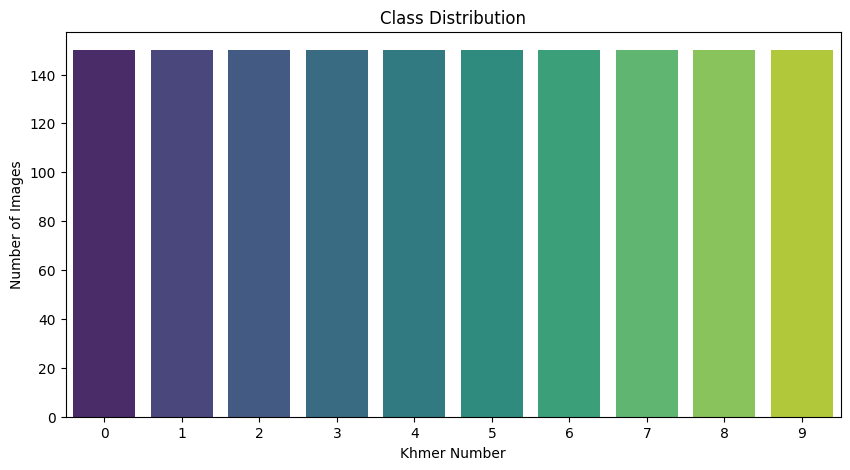

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
plt.xlabel("Khmer Number")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

##  Display some sample images

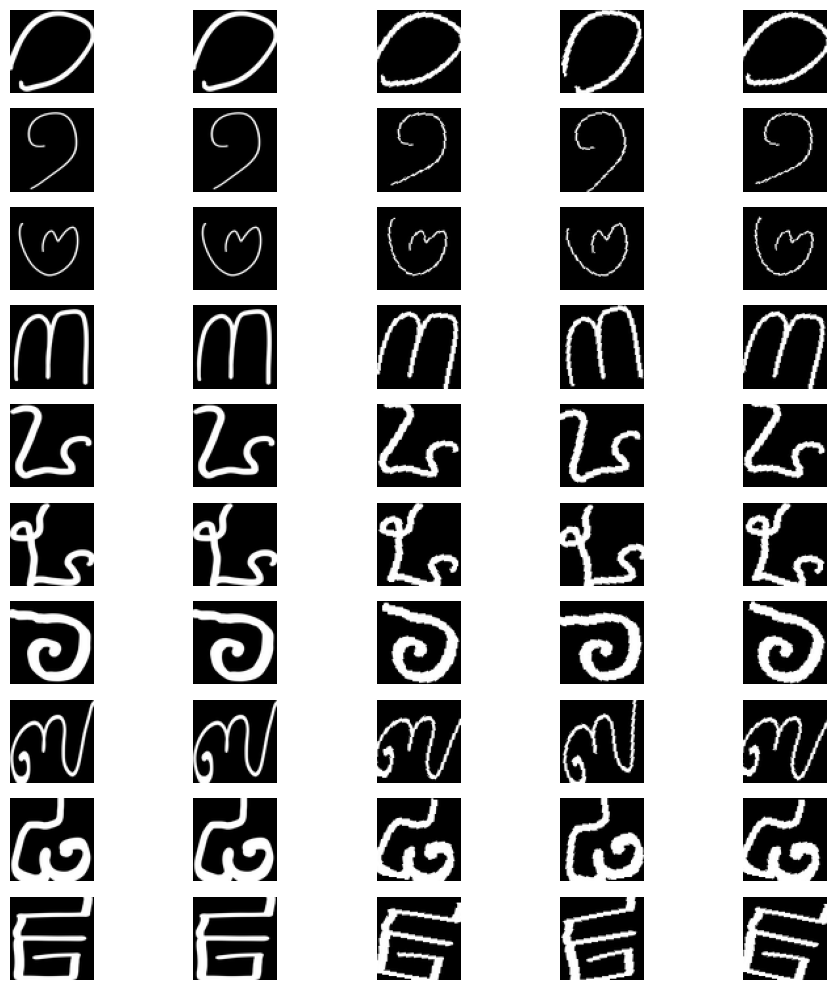

In [36]:
def show_sample_images(dataset_path, classes, num_samples=5):
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(10, 10))
    for i, cls in enumerate(classes):
        class_dir = os.path.join(dataset_path, cls)
        images = os.listdir(class_dir)[:num_samples]
        for j, img_name in enumerate(images):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
        axes[i, 0].set_ylabel(cls, rotation=0, size=12, labelpad=20)
    plt.tight_layout()
    plt.show()

show_sample_images(dataset_path, classes)

## Analyze image properties

In [37]:
image_sizes = []
pixel_means = []

for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    images = os.listdir(class_dir)
    for img_name in images[:10]:  # Sample 10 images per class
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        image_sizes.append(img.size)
        img_array = np.array(img.convert('L'))  # Convert to grayscale
        pixel_means.append(np.mean(img_array))

##  Show image size distribution

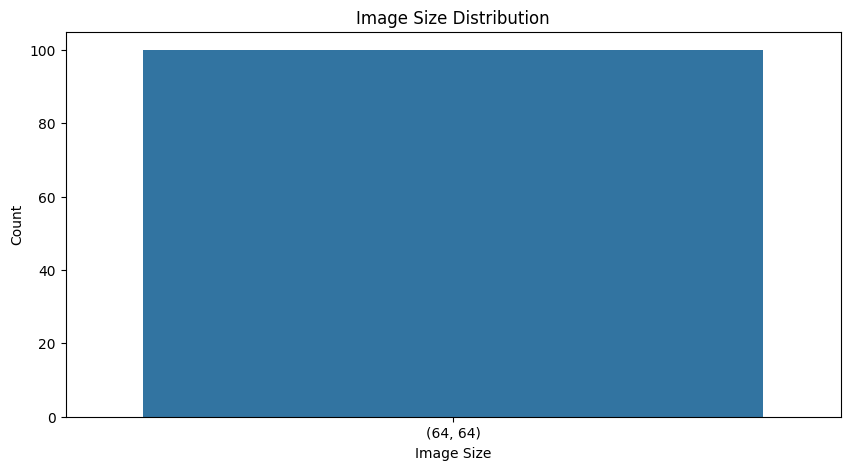

In [38]:
size_counts = Counter(image_sizes)
plt.figure(figsize=(10, 5))
sns.barplot(x=[str(size) for size in size_counts.keys()], y=size_counts.values())
plt.xlabel("Image Size")
plt.ylabel("Count")
plt.title("Image Size Distribution")
plt.show()

## Show pixel intensity distribution

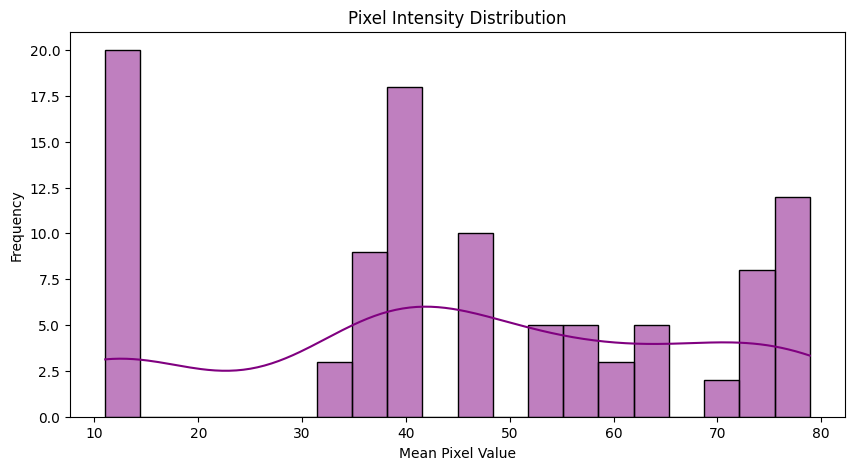

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(pixel_means, bins=20, kde=True, color='purple')
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

## Preprocessing: Convert to grayscale and normalize

In [30]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 (if needed)
    img = img / 255.0  # Normalize
    return img

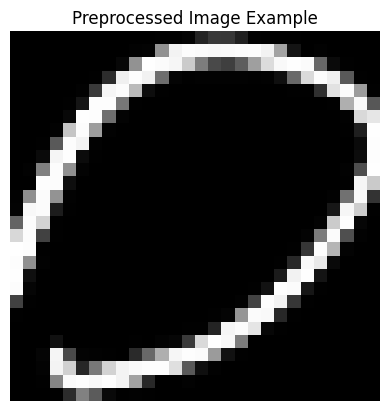

In [39]:
sample_img_path = os.path.join(dataset_path, classes[0], os.listdir(os.path.join(dataset_path, classes[0]))[0])
preprocessed_img = preprocess_image(sample_img_path)
plt.imshow(preprocessed_img, cmap='gray')
plt.title("Preprocessed Image Example")
plt.axis('off')
plt.show()
